**In-class activity N°3**

Group 2:

* Andrea Franco
* Andres Salguero
* Harpreet Kaur

# ----- Class Activity 2 -----

## Libraries

In [203]:
import pandas as pd
import numpy as np
from sklearn import linear_model

from sklearn.metrics import mean_absolute_error,mean_squared_error 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt

## Stock market data

The business would like to predict any of the columns of data from July 30, 2021 based on the data for July 1 to July 29, 2021. So this is a predictive analysis activity.

In our case, we will predict the **volume** based on previous data.

Feature descriptions:

* symbol: the underlying stock

* date: the dataset date

* adjusted close: the closing price of the underlying stock after extended trading session

* stock price: the closing price of the underlying stock

* option symbol: string combining other fields identifying the option

* expiration: date that the option expires

* strike: the price that the option gives you the right to trade the underlying stock

* call/put: whether the option is a Call (right to buy underlying stock) or a Put (right to sell underlying stock)

* ask/bid/meanprice: market prices of the option (last offer to sell, last offer to buy, and the average of the two prices)

* iv: how fearful the market is of a market crash or severe decline in prices

* volume: number of contracts traded today

* open interest: number of contracts currently held

* greeks (delta, gamma, vega, theta, rho): group of five metrics used to analyze the risk and potential return of options contracts.



## IV) Data Extraction

As the dataset has already been characterized, identified and acquired, we start the data lifecycle from the Data extraction.

In [204]:
df = pd.read_csv("https://raw.githubusercontent.com/afscomercial/big-data-fundamental/main/class-activities/data_activity2.csv")
df

,symbol,exchange,date,adjusted close,option symbol,expiration,strike,call/put,style,ask,...,iv,volume,open interest,stock price for iv,*,delta,vega,gamma,theta,rho
0,SPY,NYSEArca,07/30/2021,438.51,SPY 210730C00215000,07/30/2021,215.0,C,A,224.56,...,-1.000000,0,0,438.97,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
1,SPY,NYSEArca,07/30/2021,438.51,SPY 210730P00215000,07/30/2021,215.0,P,A,0.01,...,-1.000000,0,1401,438.97,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
2,SPY,NYSEArca,07/30/2021,438.51,SPY 210730C00220000,07/30/2021,220.0,C,A,219.56,...,-1.000000,0,1,438.97,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
3,SPY,NYSEArca,07/30/2021,438.51,SPY 210730P00220000,07/30/2021,220.0,P,A,0.01,...,-1.000000,50,328,438.97,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
4,SPY,NYSEArca,07/30/2021,438.51,SPY 210730C00225000,07/30/2021,225.0,C,A,214.56,...,-1.000000,0,0,438.97,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221041,SPY,NYSEArca,07/01/2021,430.43,SPY 231215P00630000,12/15/2023,630.0,P,A,206.50,...,0.148305,0,1,430.26,*,-0.924500,0.750370,0.001112,-0.011128,-14.857175
221042,SPY,NYSEArca,07/01/2021,430.43,SPY 231215C00635000,12/15/2023,635.0,C,A,2.20,...,0.148310,0,146,430.26,NaN,0.051628,0.710649,0.001053,-0.005507,0.496773
221043,SPY,NYSEArca,07/01/2021,430.43,SPY 231215P00635000,12/15/2023,635.0,P,A,211.50,...,0.148310,0,0,430.26,*,-0.928176,0.710649,0.001053,-0.010792,-15.014119
221044,SPY,NYSEArca,07/01/2021,430.43,SPY 231215C00640000,12/15/2023,640.0,C,A,2.73,...,0.148310,5,1,430.26,*,0.048170,0.672488,0.000997,-0.005217,0.463973



## Step V) Data Validation and Cleansing
 For this we will check for null functions in our dataset using isnull function() and also check for unique values using unique function.

In [205]:
df.isnull().sum()

symbol                     0
exchange                   0
date                       0
adjusted close             0
option symbol              0
expiration                 0
strike                     0
call/put                   0
style                      0
ask                        0
bid                        0
mean price                 0
iv                         0
volume                     0
open interest              0
stock price for iv         0
*                     192007
delta                      0
vega                       0
gamma                      0
theta                      0
rho                        0
dtype: int64

### Checking for unique values:

In [206]:
df.nunique()

symbol                     1
exchange                   1
date                      21
adjusted close            21
option symbol          13960
expiration                48
strike                   312
call/put                   2
style                      1
ask                    22926
bid                    22611
mean price             36172
iv                    146910
volume                  6205
open interest          14825
stock price for iv        21
*                          1
delta                 182814
vega                  179397
gamma                  28374
theta                  91796
rho                   183742
dtype: int64

### Dropping all the columns with only one unique value:


From the previous analysis, we decided to drop the columns with one unique value because it won't give any insight to the model as it doesn't have any variety of data at all that help us to the determine the correct output. The columns that present this behavior are "symbol", "exchange", "style" and "*"

In [207]:
df = df.loc[:, df.nunique() > 1]

In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221046 entries, 0 to 221045
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   date                221046 non-null  object 
 1   adjusted close      221046 non-null  float64
 2   option symbol       221046 non-null  object 
 3   expiration          221046 non-null  object 
 4   strike              221046 non-null  float64
 5   call/put            221046 non-null  object 
 6   ask                 221046 non-null  float64
 7   bid                 221046 non-null  float64
 8   mean price          221046 non-null  float64
 9   iv                  221046 non-null  float64
 10  volume              221046 non-null  int64  
 11  open interest       221046 non-null  int64  
 12  stock price for iv  221046 non-null  float64
 13  delta               221046 non-null  float64
 14  vega                221046 non-null  float64
 15  gamma               221046 non-nul

### Dropping columns that do not give value to the target

In [209]:
data = df.copy()

In [210]:
data.drop(['expiration', 'option symbol'],axis=1, inplace=True)

### Converting Qualitative feature into Quantitative Feature:
Here ,we are converting call/put qualitative feature into Quantitative feature

In [211]:
le = LabelEncoder()

In [212]:
data['call/put'] = le.fit_transform(data['call/put'])
label_mapping1 = dict(enumerate(le.classes_))
print(label_mapping1)

{0: 'C', 1: 'P'}


## Step VI) Data aggregation and representation:
In this step we have to integrate multiple datasets into one single dataset. As the dataset we are dealing with does not have multiple datasets, we don't need to do this step and data is in the format of csv file.

## VII) Data Analysis

### 1. Target variable exploration

From the exploration of our target variable "volume" we can see that most of the data has a value lesser than 100'000.

Text(0, 0.5, 'Frequency')

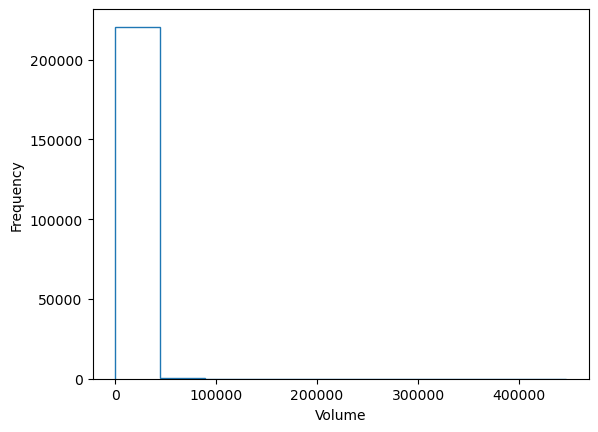

In [213]:
counts, bins = np.histogram(df['volume'])
plt.stairs(counts, bins)
plt.xlabel('Volume')
plt.ylabel('Frequency')

In [214]:
data['volume'].describe()

count    221046.000000
mean        405.715661
std        5100.355521
min           0.000000
25%           0.000000
50%           0.000000
75%          19.000000
max      446333.000000
Name: volume, dtype: float64

In fact, more than 75% of the data has a value less or equal than 19

<Axes: >

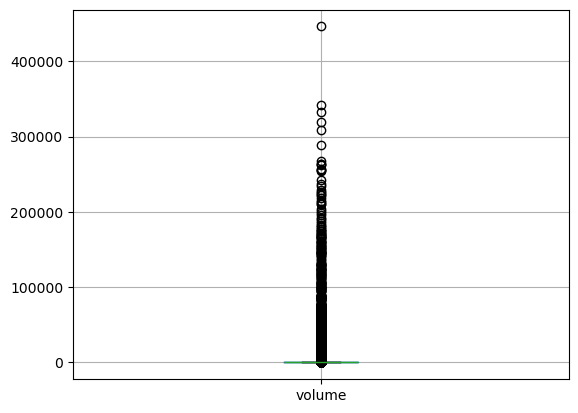

In [215]:
data.boxplot(column = ['volume'])

In [216]:
data[data['volume'] > 800].count()

date                  9761
adjusted close        9761
strike                9761
call/put              9761
ask                   9761
bid                   9761
mean price            9761
iv                    9761
volume                9761
open interest         9761
stock price for iv    9761
delta                 9761
vega                  9761
gamma                 9761
theta                 9761
rho                   9761
dtype: int64

In [217]:
print(f'The values above 800 only represent a {round((9761/len(data))*100,2)} % of the data')

The values above 800 only represent a 4.42 % of the data


As the values above 800 only represent a 4.42 % of the data they can be considered outliers and we can remove them as they may affect our prediction results.

In [218]:
data = data[data['volume'] < 800]

# A copy of the data is created for Activity 3
data3 = data.copy()

### 2. Numerical Variables Exploration

In [219]:
# List of numerical columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_cols.remove('volume')  # Exclude the target variable

# Summary statistics of numerical variables
print(data[numerical_cols].describe())

       adjusted close         strike       call/put            ask  \
count   211271.000000  211271.000000  211271.000000  211271.000000   
mean       435.110483     397.709986       0.494966      43.435186   
std          3.842574      95.343820       0.499976      61.306396   
min        424.970000      25.000000       0.000000       0.010000   
25%        432.930000     345.000000       0.000000       1.920000   
50%        435.460000     409.000000       0.000000      18.020000   
75%        438.510000     456.000000       1.000000      55.920000   
max        441.020000     655.000000       1.000000     416.890000   

                 bid     mean price             iv  open interest  \
count  211271.000000  211271.000000  211271.000000  211271.000000   
mean       42.705085      43.068429       0.239961    1210.231144   
std        60.677646      60.990365       0.220703    4244.670131   
min         0.000000       0.000000      -1.000000       0.000000   
25%         1.710000    

### 3. Finding the Correlation Between Variables

We can see from the correlation matrix below that some variables have a high correlation. 

As the correlation is so high, this suggests that the features have a perfect positive correlation, meaning they contain exactly the same information. Then, we can drop one of the three columns of "ask" "bid" or "mean price" because the three of them will feed the model with the same information so having the three is redundant.

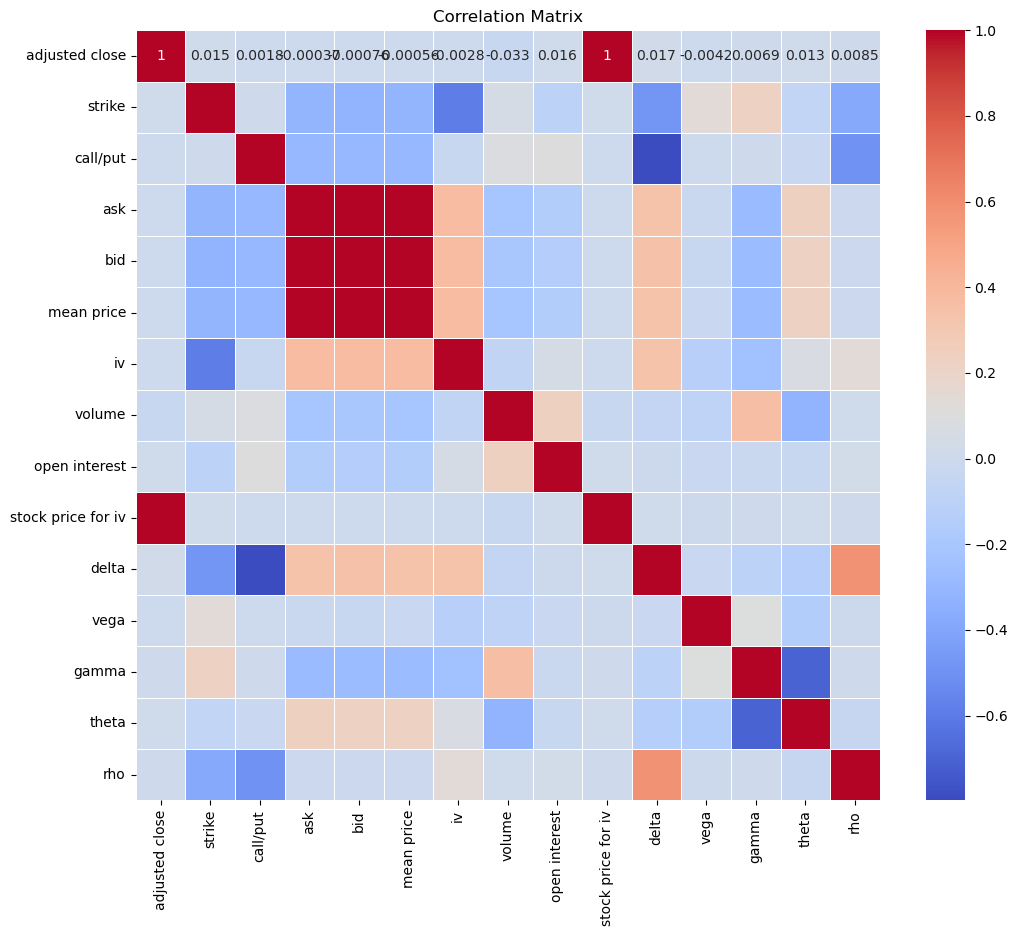

volume                1.000000
gamma                 0.367914
open interest         0.239782
call/put              0.085044
strike                0.046516
rho                   0.011970
adjusted close       -0.032910
stock price for iv   -0.033291
delta                -0.054317
iv                   -0.073652
vega                 -0.081759
bid                  -0.207790
mean price           -0.208546
ask                  -0.209298
theta                -0.326758
Name: volume, dtype: float64


In [221]:
# Correlation matrix
correlation_matrix = data.drop(columns='date').corr()

# Display the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Correlation with the target variable
print(correlation_matrix['volume'].sort_values(ascending=False))

Dropping two features:

In [222]:
data.drop(columns=['ask','mean price'], inplace = True)

Update the value for numerical_columns

In [223]:
# List of numerical columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns.tolist()

### 4. Normalizing Values Using Standard Scaling

In [224]:

# Standard Scaling for numerical features
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

### 5. Split the data into train and test subsets

As the business would like to predict the volume from July 30, 2021 based on the data for July 1 to July 29, 2023, we will take all of the observations from July 30 as our test set and all of the other data as our training set.

In [225]:
train_data = data[data['date'] != '07/30/2021']
test_data = data[data['date'] == '07/30/2021']


And divide the data in X (features) and y (target feature)

In [226]:
# target feature
y_train = train_data['volume']
y_test = test_data['volume']

In [227]:
# features
X_train = train_data.drop(columns=['volume','date']) # we also drop date as it is not necessary for our model training

In [228]:
# features
X_test = test_data.drop(columns=['volume','date']) # we also drop date as it is not necessary for our model training



### 6. Build a machine-learning model

The next step is to build a ML model. As the problem requires make a forecast of our target feature, being that feature a continue numerical variable, the chosen model is a regression algorithm. 

#### Linear regression
From Scikit Learn library we create an instance of the linear regression model:

In [229]:
reg = linear_model.LinearRegression()

Then, with .fit we can use train the model by adjusting data from X to Y.

LinearRegression will take in its fit method arrays X, y and will store the coefficients 
 of the linear model in its coef_ member:

In [230]:
reg.fit(X_train,y_train)

#Visualize coefficients from the model
reg.coef_

array([ 0.03033633,  0.03038243,  0.10180048, -0.05325208, -0.00389414,
        0.22636578, -0.06965747,  0.0592057 , -0.12517186,  0.28997714,
       -0.1098898 ,  0.02693233])

#### Evaluation Metrics For Regression

Finally, we check the performance of the model with help of evaluation metrics. For Regression algorithms it is widely use mean_absolute_error, and mean_squared_error metrics for this purpose.

In [231]:
y_pred = reg.predict(X_test) 

In [232]:
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred) 
#squared True returns MSE value, False returns RMSE value. 
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) #default=True 
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False) 
  
print("MAE:",mae) 
print("MSE:",mse) 
print("RMSE:",rmse)

MAE: 0.40878513514988873
MSE: 0.676134709897641
RMSE: 0.8222741087360352


In [233]:
# Get the minimum and maximum values of target variable
min_target_value = data['volume'].min()
max_target_value = data['volume'].max()

print(f'Min target value: {min_target_value}\nMax target value: {max_target_value}')

# Normalize the error by the target variable range and express as a percentage
normalized_mae = (mae / (max_target_value - min_target_value)) * 100
normalized_mse = (mse / (max_target_value - min_target_value)) * 100
normalized_rmse = (rmse / (max_target_value - min_target_value)) * 100


print(f"Normalized MAE (as %): {normalized_mae:.2f}%")
print(f"Normalized MSE (as %): {normalized_mse:.2f}%")
print(f"Normalized RMSE (as %): {normalized_rmse:.2f}%")

Min target value: -0.34836061292854553
Max target value: 7.326928881516546
Normalized MAE (as %): 5.33%
Normalized MSE (as %): 8.81%
Normalized RMSE (as %): 10.71%


#### Results analysis

* The Normalized MAE suggests a moderate level of error. The model's predictions are off by an average of 5.33% from the target variable's range (-0.3484 to 7.3269).
* The Normalized RMSE indicates a higher level of error compared to MAE. On average, the model's predictions deviate from the actual values by 10.
* The Normalized MSE, while lower than the previous case (likely due to a smaller range), this value still reflects some larger errors affecting the average. Squaring them in MSE inflates their contribution.

* The higher normalized RMSE compared to MAE suggests the presence of some larger errors that are affecting the model's performance.

**Recomendations:**

If the C-level executives consider that a new iteration of the data analysis phase must be made, we can make some considerations:

* Analyze the distribution of errors. Are there any other outliers significantly affecting the MSE and RMSE?
* Depending on the application's needs, a 5-10% average error might be acceptable. However, if higher accuracy is crucial, it can be considered:
    * Trying different algorithms or feature engineering techniques.
    * Tuning hyperparameters of the current model.
    * Using robust regression methods less sensitive to outliers.

**Overall:**

The model's performance seems moderate in terms of capturing the target variable's trend. The presence of larger errors might require further investigation or model adjustments depending on your specific requirements for accuracy. 

### 7. Perform a cross-validation technique

One way to use cross-validation is to call the cross_val_score function on the estimator and the dataset.

The following code cell estimates the accuracy of a linear regression on our dataset by splitting the data, fitting a model and computing the score 5 consecutive times (with different splits each time):

In [234]:
#if not specified, the metric evaluated is MSE in the case of regression models by default
scores = cross_val_score(reg, X_train, y_train, cv=5)
scores

array([0.2348231 , 0.23460405, 0.23244279, 0.21619681, 0.20533891])

In [235]:
for score in scores:    
    normalized_mse = (score / (max_target_value - min_target_value)) * 100
    print(f"Normalized MSE (as %): {normalized_mse:.2f}%")

Normalized MSE (as %): 3.06%
Normalized MSE (as %): 3.06%
Normalized MSE (as %): 3.03%
Normalized MSE (as %): 2.82%
Normalized MSE (as %): 2.68%


From this values we can  see that the percentage of error give us very good values as the error is less than 5% for each of the cross-validated cases.

## VIII) Data Visualization

We can visualize our predicted values vs the real test values to get a graphical idea of the error of the model:

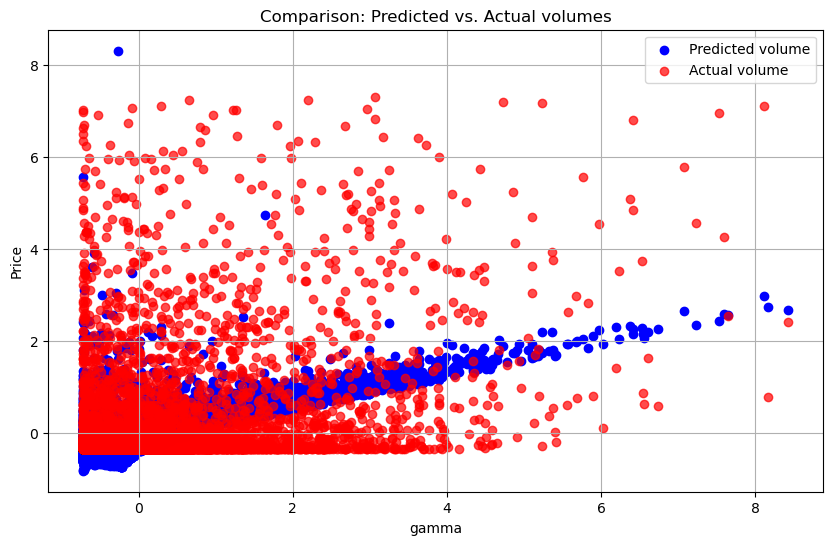

In [236]:
# Create the first scatter plot (predicted values vs feature1)
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.scatter(X_test['gamma'], y_pred, color='blue', label='Predicted volume')

# Create the second scatter plot (test values vs feature1) on the same plot
plt.scatter(X_test['gamma'], y_test, color='red', alpha=0.7, label='Actual volume')

# Add labels and title
plt.xlabel('gamma')
plt.ylabel('Price')
plt.title('Comparison: Predicted vs. Actual volumes')

# Add legend
plt.legend()

# Grid and show the plot
plt.grid(True)
plt.show()

We can see that the predictions, for a simple model as a linear regression, give us a good estimation for most of the values. How ever, further improvements can be made by changing the model to a more complex one and try to fit better the data to predict values that resembles the real data.


## IX) Utilization of Analysis Results


We can conclude from the results that this model can be used with caution to estimate volume representing the number of contracts traded in a single day, as the error is less than 5%. How ever, it performs better in situations where the market doesn't present outstanding values as in the cases discarded from the training data. A further analysis can be made in order to characterize the values of the other features in that odd events where the volume exceeds a value of 900, and inform the company that shouldn't use the model to predict the volume in that cases, or use it with caution.

Even with a Mean Squared Error (MSE) less than 5%, which signifies a good fit for the model,  stock market predictions are inherently uncertain. However, we could consider some potential uses for the analysis results, for example:

1. Identify Abnormal Volume

2. Create algorithmic Trading Strategies


3. Market Making and Liquidity Management

4. Portfolio Rebalancing

5. Risk Management


# ---- Class Activity 3 Point 2 ----

Engineer a new feature and compare your Activity 2 results with and without this new feature.
The new feature we are going to engineer is the "month" feature. We are going to extract the month from the date feature and use it as a new feature in our model.

The Feature Engineering is handled in the Data Analysis step VII, before the step 3 to find the correlation between variables.


## VII) Data Analysis

### Feature Engineering

Start from a copy of the dataframe from Activity 2 after the  pre-processing steps.
For Feature Engineering  the technique of rolling statistics will be used to create a new feature. This technique consists of calculating the mean of a feature over a certain period of time. In this case, we will calculate the mean of the volume over the last 7 days.

In [237]:
df3 = data3.copy()

# Rolling Statistics
# Creating rolling mean and std for volume
df3['volume_roll_mean_7'] = df3['volume'].rolling(window=7).mean()

# For a 7-day rolling mean, the first 6 entries (since the window size is 7) will not have enough data points to compute 
# the mean, the first 6 entries will be NaN. We can fill these NaN values with 0.
df3['volume_roll_mean_7'].fillna(0, inplace=True)


### 3. Finding the Correlation Between Variables

In [238]:

# Correlation matrix
correlation_matrix = df3.drop(columns='date').corr()

# Get the correlation of all features with the target variable 'volume'
volume_correlation = correlation_matrix['volume'].sort_values(ascending=False)
volume_correlation

volume                1.000000
volume_roll_mean_7    0.635100
gamma                 0.367914
open interest         0.239782
call/put              0.085044
strike                0.046516
rho                   0.011970
adjusted close       -0.032910
stock price for iv   -0.033291
delta                -0.054317
iv                   -0.073652
vega                 -0.081759
bid                  -0.207790
mean price           -0.208546
ask                  -0.209298
theta                -0.326758
Name: volume, dtype: float64

The new feature volume_roll_mean_7  represents the rolling mean of the volume over the last 7 days and has the highest correlation with the target variable volume.

In [239]:
# drop irrelevant columns
df3.drop(columns=['ask','mean price'], inplace = True)

### 4. Normalizing Values Using Standard Scaling

In [240]:
# List of numerical columns
numerical_cols = df3.select_dtypes(include=['float64', 'int64']).columns.tolist()

In [241]:
# Standard Scaling for numerical features
scaler = StandardScaler()
df3[numerical_cols] = scaler.fit_transform(df3[numerical_cols])

### 5. Split the data into train and test subsets

As the business would like to predict the volume from July 30, 2021 based on the data for July 1 to July 29, 2023, we will take all of the observations from July 30 as our test set and all of the other data as our training set.

In [242]:
train_data3 = df3[df3['date'] != '07/30/2021']
test_data3 = df3[df3['date'] == '07/30/2021']

# target feature
y_train3 = train_data3['volume']
y_test3 = test_data3['volume']

# features
X_train3 = train_data3.drop(columns=['volume','date']) # we also drop date as it is not necessary for our model training

# features
X_test3 = test_data3.drop(columns=['volume','date']) # we also drop date as it is not necessary for our model training




### 6. Build a machine-learning model

The next step is to build a ML model. As the problem requires make a forecast of our target feature, being that feature a continue numerical variable, the chosen model is a regression algorithm. 

#### Linear regression
From Scikit Learn library we create an instance of the linear regression model:

In [243]:
reg3 = linear_model.LinearRegression()

Then, with .fit we can use train the model by adjusting data from X to Y.

LinearRegression will take in its fit method arrays X, y and will store the coefficients 
 of the linear model in its coef_ member:

In [244]:
reg3.fit(X_train3,y_train3)

#Visualize coefficients from the model
reg3.coef_

array([-0.00281207,  0.02736314,  0.08163348, -0.04618859,  0.01411161,
        0.15041432, -0.00136245,  0.02705917, -0.00413207, -0.02143926,
       -0.0198371 ,  0.02305187,  0.60720424])

#### Evaluation Metrics For Regression

Finally, we check the performance of the model with help of evaluation metrics. For Regression algorithms it is widely use mean_absolute_error, and mean_squared_error metrics for this purpose.

In [245]:
y_pred3 = reg3.predict(X_test3) 

In [246]:
mae3 = mean_absolute_error(y_true=y_test3,y_pred=y_pred3) 
#squared True returns MSE value, False returns RMSE value. 
mse3 = mean_squared_error(y_true=y_test3,y_pred=y_pred3) #default=True 
rmse3 = mean_squared_error(y_true=y_test3,y_pred=y_pred3,squared=False) 
  
print("MAE:",mae3) 
print("MSE:",mse3) 
print("RMSE:",rmse3)

MAE: 0.3376871793488731
MSE: 0.48407692856231127
RMSE: 0.6957563715571071


In [247]:
# Get the minimum and maximum values of target variable
min_target_value3 = df3['volume'].min()
max_target_value3 = df3['volume'].max()


# Normalize the error by the target variable range and express as a percentage
normalized_mae3 = (mae3 / (max_target_value3 - min_target_value3)) * 100
normalized_mse3 = (mse3 / (max_target_value3 - min_target_value3)) * 100
normalized_rmse3 = (rmse3 / (max_target_value3 - min_target_value3)) * 100


print(f"Normalized MAE Activity3(as %): {normalized_mae3:.2f}%")
print(f"Normalized MSE Activity3(as %): {normalized_mse3:.2f}%")
print(f"Normalized RMSE Activity3(as %): {normalized_rmse3:.2f}%")

print('-' * 50)

print(f"Normalized MAE Activity2(as %): {normalized_mae:.2f}%")
print(f"Normalized MSE Activity2(as %): {normalized_mse:.2f}%")
print(f"Normalized RMSE Activity2(as %): {normalized_rmse:.2f}%")

Normalized MAE Activity3(as %): 4.40%
Normalized MSE Activity3(as %): 6.31%
Normalized RMSE Activity3(as %): 9.06%
--------------------------------------------------
Normalized MAE Activity2(as %): 5.33%
Normalized MSE Activity2(as %): 2.68%
Normalized RMSE Activity2(as %): 10.71%


### 7. Perform a cross-validation technique

One way to use cross-validation is to call the cross_val_score function on the estimator and the dataset.

The following code cell estimates the accuracy of a linear regression on our dataset by splitting the data, fitting a model and computing the score 5 consecutive times (with different splits each time):

In [248]:
#if not specified, the metric evaluated is MSE in the case of regression models by default
scores3 = cross_val_score(reg3, X_train3, y_train3, cv=5)
scores3

array([0.44554353, 0.44668796, 0.433818  , 0.42845565, 0.42260345])

In [249]:
for score in scores3:    
    normalized_mse3 = (score / (max_target_value3 - min_target_value3)) * 100
    print(f"Normalized MSE for Activity3(as %): {normalized_mse3:.2f}%")

print('-' * 50)

for score in scores:
    normalized_mse = (score / (max_target_value - min_target_value)) * 100
    print(f"Normalized MSE for Activity2(as %): {normalized_mse:.2f}%")

Normalized MSE for Activity3(as %): 5.80%
Normalized MSE for Activity3(as %): 5.82%
Normalized MSE for Activity3(as %): 5.65%
Normalized MSE for Activity3(as %): 5.58%
Normalized MSE for Activity3(as %): 5.51%
--------------------------------------------------
Normalized MSE for Activity2(as %): 3.06%
Normalized MSE for Activity2(as %): 3.06%
Normalized MSE for Activity2(as %): 3.03%
Normalized MSE for Activity2(as %): 2.82%
Normalized MSE for Activity2(as %): 2.68%


### Conclusion

Model Activity3, which includes the new feature volume_roll_mean_7, demonstrates lower MAE and RMSE values compared to Model Activity2, suggesting that it has better prediction accuracy and lower average absolute errors. The higher MSE for Activity3 might indicate some larger errors or outliers affecting the model's performance.

However, the consistently lower normalized MSE in Activity2 could imply that while the model without the new feature has lower squared errors on average, it might be less accurate overall. The inclusion of the rolling mean feature helps the model capture more temporal trends in the volume data, leading to better performance in terms of MAE and RMSE, which are crucial metrics for assessing prediction quality.

In conclusion, Activity3 appears to be the better model overall for predicting volume due to its lower MAE and RMSE, despite the higher MSE, indicating it generally provides more accurate predictions.

# References

* https://scikit-learn.org/stable/modules/linear_model.html
* https://scikit-learn.org/stable/modules/cross_validation.html
